# Information Filter Association

$\Delta_{j,k} = m_j - m_k$

We obtain the posterior for $\Delta_{j,k}$ by first calculating the joint over $m_j$ and $m_k$

$p\left(m_j,m_k \mid z_{1:t}, u_{1:t}, c_{1:t}\right) = \int{ p\left(m_j, m_k \mid x_{1:t}, z_{1:t}, c_{1:t}\right) p\left(x_{1:t} \mid z_{1:t}, u_{1:t}, c_{1:t} \right)dx_{1:t}}$

$\xi_{[j,k]}$, $\Omega_{[j,k]}$ : Information form of marginal posterior.

$\Omega_{jk}$ : Submatrix of the joint information form.

$\tau\left(j\right)$, $\tau\left(k\right)$: The sets of poses at which the robot observed feature $j$, and feature $k$, respectively.

$\tau(j,k) = \tau(j) \cup \tau(k)$: The set of poses at which the robot observed $m_j$ or $m_k$

$\tilde{\mu}$: Pose vector given by GraphSLAM

$\mu_{[j,k]} = \Omega^{-1}_{jk,jk} \left( \xi_{jk} - \Omega_{jk, \tau(j,k)} \mu_{\tau(j,k)}\right) $: Mean for the features $m_j$ and $m_k$ for the joint feature pair.

The marginalization lemma provides us with the marginal information matrix for the posterior over $(m_j, m_k)^T$:

$\Omega_{[j,k]} = \Omega_{jk,jk} - \Omega_{jk,\tau(j,k)} \Sigma_{\tau(j,k),\tau(j,k)} \Omega_{\tau(j,k),jk}$

$\xi_{[j,k]} = \Omega_{[j,k]} \mu_{[j,k]}$

$p(m_j, m_k \mid z_{1:t}, u_{1:t}, c_{1:t}) = \eta \cdot exp \left\lbrace -\frac{1}{2} \begin{bmatrix}m_j \\ m_k\end{bmatrix}^T \Omega_{[j,k]} \begin{bmatrix}m_j \\ m_k\end{bmatrix} + \begin{bmatrix}m_j \\ m_k\end{bmatrix}^T \xi_{[j,k]} \right\rbrace$

$\Delta_{j,k} = m_j - m_k$

$= \begin{bmatrix} I \\ -I\end{bmatrix}^T \begin{bmatrix} m_j \\ m_k\end{bmatrix} = \begin{bmatrix} m_j \\ m_k\end{bmatrix}^T \begin{bmatrix} I \\ -I\end{bmatrix}$

Plugging this into the definition of a Gaussian in information representation, we obtain

$p(\Delta_{j,k} \mid z_{1:t}, u_{1:t}, c_{1:t}) = \eta \cdot exp \left\lbrace -\frac{1}{2} \Delta^T_{j,k}\begin{bmatrix}I \\ -I\end{bmatrix}^T \Omega_{[j,k]} \begin{bmatrix}I \\ -I\end{bmatrix}\Delta_{j,k} + \Delta^T_{j,k}\begin{bmatrix}I \\ -I\end{bmatrix}^T \xi_{[j,k]} \right\rbrace$

$=\eta \cdot exp\left\lbrace -\frac{1}{2}\Delta^T_{j,k} \Omega_{\Delta_{j,k}} \Delta_{j,k} + \Delta^T_{j,k} \xi_{\Delta_{j,k}}\right\rbrace$


$\Omega_{\Delta_{j,k}}$: Gaussian information matrix

$\xi_{\Delta_{j,k}}$: Information vector

To calculate the probability that this Gaussian assumes the value of $\Delta_{j,k}=0$.

$p(\Delta_{j,k} \mid z_{1:t}, u_{1:t}, c_{1:t}) = \|2\pi \Omega^{-1}_{\Delta_{j,k}}\|^{-\frac{1}{2}} \cdot exp \left\lbrace -\frac{1}{2} \left(\Delta_{j,k} - \mu_{\Delta_{j,k}}\right)^T\Omega_{\Delta_{j,k}} \left(\Delta_{j,k} - \mu_{\Delta_{j,k}}\right) \right\rbrace$

$\mu_{\Delta_{j,k}} = \Omega^{-1}_{\Delta_{j,k}}\xi_{\Delta_{j,k}}$

The desired probability for $\Delta_{j,k}=0$ is

$p\left(\Delta_{j,k} \mid z_{1:t}, u_{1:t}, c_{1:t}\right) = \|2\pi \Omega^{-1}_{\Delta_{j,k}}\|^{-\frac{1}{2}} \cdot exp \left\lbrace -\frac{1}{2} \mu^T_{\Delta_{j,k}}\Omega_{\Delta_{j,k}} \mu_{\Delta_{j,k}} \right\rbrace$

$\Omega_{\Delta_{j,k}} = \Sigma^{-1}_{\Delta_{j,k}}$

$p\left(\Delta_{j,k} \mid z_{1:t}, u_{1:t}, c_{1:t}\right) = \|2\pi \Sigma_{\Delta_{j,k}}\|^{-\frac{1}{2}} \cdot exp \left\lbrace -\frac{1}{2} \mu^T_{\Delta_{j,k}}\Sigma^{-1}_{\Delta_{j,k}} \mu_{\Delta_{j,k}} \right\rbrace$



Sigma_djk
[[0.5 0. ]
 [0.  0.5]]
mu_djk
[[-0.05]
 [-0.05]]
probability: 0.31672230900327414
Sigma_djk
[[0.5 0. ]
 [0.  0.5]]
mu_djk
[[-0.5]
 [-0.5]]
probability: 0.19306470526010783


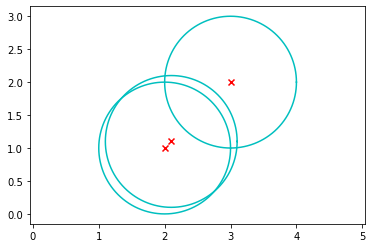

In [2]:
# Test of correspondence without pose estimation
import numpy as np
import matplotlib.pyplot as plt

m0 = np.array([
    [2],
    [1]
])
S0 = np.array([
    [1.0**2, 0.0],
    [0.0,    1.0**2],
])

m1 = np.array([
    [2.1],
    [1.1]
])

S1 = np.array([
    [1.0**2, 0.0],
    [0.0,    1.0**2],
])

m2 = np.array([
    [3.0],
    [2.0]
])

S2 = np.array([
    [1.0**2, 0.0],
    [0.0,    1.0**2],
])

plt.figure('map')
plt.axis('equal')

def draw_feature(mu, Cov, n_sig=1):
    # eigenvalue, eigenvector
    w, v = np.linalg.eig(Cov)
    theta = np.arctan2(v[1,0], v[0,0])

    x = [0] * 361
    y = [0] * 361

    cos = np.cos(theta)
    sin = np.sin(theta)

    for a in range(361):
        x0 = w[0] * np.cos(a*np.pi/180) * n_sig
        y0 = w[1] * np.sin(a*np.pi/180) * n_sig

        x[a] = x0*cos - y0*sin + mu[0,0]
        y[a] = x0*sin + y0*cos + mu[1,0]

    plt.plot(x, y, c='c')
    plt.scatter(mu[0,0], mu[1,0], c='r', marker='x')

def test_correspondence(mj, Sj, mk, Sk):
    I = np.array([[ 1,  0],
                  [ 0,  1],
                  [-1,  0],
                  [ 0, -1]], dtype=np.float32)

    m_jk = np.zeros([4,1])
    m_jk[:2] = mj
    m_jk[2:] = mk

    S_jk = np.zeros([4,4])
    S_jk[:2,:2] = Sj
    S_jk[2:,2:] = Sk

    O_jk = np.linalg.inv(S_jk)
    xi_jk = np.matmul(O_jk,m_jk)

    O_djk = np.matmul(np.matmul(I.T, O_jk), I)
    xi_djk = np.matmul(I.T, xi_jk)
    
    invO_djk = np.linalg.inv(O_djk)
    mu_djk = np.matmul(invO_djk, xi_djk)

    print('Sigma_djk')
    print(invO_djk)

    print('mu_djk')
    print(mu_djk)

    det = np.linalg.det(invO_djk)
    eta = 1 / (2*np.pi * np.sqrt(det))

    p = eta * np.exp(-0.5 * np.matmul(np.matmul(mu_djk.T, O_djk), mu_djk))
    p = p[0,0]

    print('probability:', p)

    return p

draw_feature(m0, S0)
draw_feature(m1, S1)
draw_feature(m2, S2)

p = test_correspondence(m0, S0, m1, S1)

p = test_correspondence(m0, S0, m2, S2)


